# Graphene

Exercise 1:
Repeat the explorations done with a square lattice: try to answer the following questions and justify your
sentences with graphs. To answer some of the questions you may have to explore the literature on graphene
(with no need to go very deep, a good review or a seminal paper shall bring you all the informations).

1) What is the upper limit of E which gives reasonable results? We will in the following restrict our study
to energies below this threshold.

2) What happens for E < 0? How does it compare to the case of a square lattice? Which property of
graphene does it underline?

3) How would you qualify the way transmission evolves with energy in the low density limit (the average evolution, not its
discretization)? How does it compare to the square lattice? Which property of graphene does it underline?

4) Focus on the very low energy limit of the dispersion relation, where discrete steps can be observed.
Comment their spacing and compare with the square lattice. Which property of graphene does it underline?

In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import kwant
from kwant.digest import uniform    # a (deterministic) pseudorandom number generator
import numpy as np
import math
from math import atan2, pi, sqrt, cos, sin
from cmath import exp
from types import SimpleNamespace
import matplotlib
from matplotlib import pyplot as plt


from pylab import rcParams
rcParams['figure.figsize'] = 5,5

In [13]:
h = 6.626069e-34 # Planck constant (Js)
h_bar = h/(2*math.pi)
e = 1.602e-19      # electron charge (C)
c = 299792458       # Light celerity (m/s)
kB = 1.3806503e-23  # Boltzmann constant (kg m2/Ks2)
m_e = 9.1e-31       # electron mass (kg)

In [3]:
def hopping(site_i, site_j):
    """
    Definition of the hopping parameter by including the magnetic field (parameter phi)
    
    """
    
    xi, yi = site_i.pos
    xj, yj = site_j.pos
    return -t* exp(-0.5j * B * (xi - xj) * (yi + yj))

In [4]:
def onsite(site):
    x, y = site.pos
    
    return -t*(math.tanh(10*((15/100)*x - 0.1*y )))/2


In [5]:
def make_system(a=1,W=20,L=20,t=1.0):
    graphene = kwant.lattice.honeycomb(a,norbs=1)
    a, b = graphene.sublattices
    sys = kwant.Builder()
 
    def rectangular(pos):
        x, y = pos
        return abs(x) < L/2 and abs(y) < W/2
    def lead_shape(pos):
        x, y = pos
        return -W/4 < y < W/4
  
    sys[graphene.shape(rectangular, (0,0))] = onsite
    hoppings = (((0, 0), a, b), ((0, 1), a, b), ((-1, 1), a, b))
    sys[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings]] = hopping

    sym0 = kwant.TranslationalSymmetry(graphene.vec((-1, 0)))
    lead0 = kwant.Builder(sym0)
    lead0[graphene.shape(lead_shape, (0, 0))] = 0
    lead0[graphene.neighbors()]= hopping
    sys.attach_lead(lead0)
    
    sym1 = kwant.TranslationalSymmetry(graphene.vec((1, 0)))
    lead1 = kwant.Builder(sym1)
    lead1[graphene.shape(lead_shape, (0, 0))] = 0
    lead1[graphene.neighbors()]= hopping
    sys.attach_lead(lead1)

    return sys

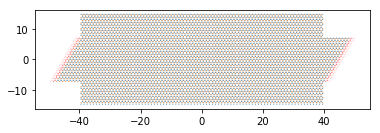

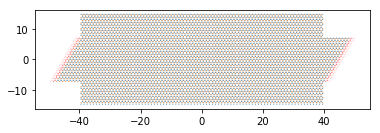

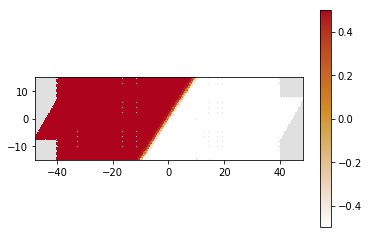

In [14]:
a = 1
W = 30
L = 80
t = 1
Ef = 1
sys = make_system(a,W,L,t)

kwant.plot(sys)

sys = make_system(a,W,L,t)
kwant.plot(sys);
kwant.plotter.map(sys, onsite)
# Finalize the system.
graph = sys.finalized()
#kwant.plotter.bands(graph.leads[1])

2.5657053925111653e-08


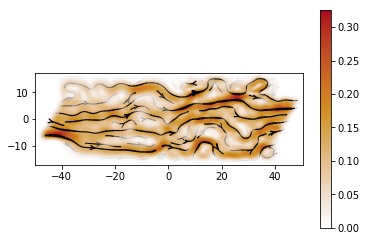

/home/jerem/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


7.697116177533497e-08


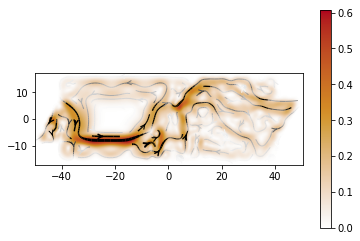

/home/jerem/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


5.442683044714613e-08


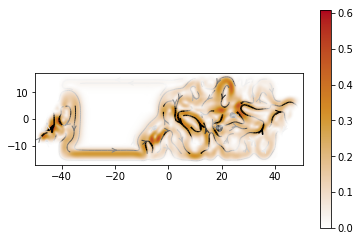

/home/jerem/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


4.443932097082787e-08


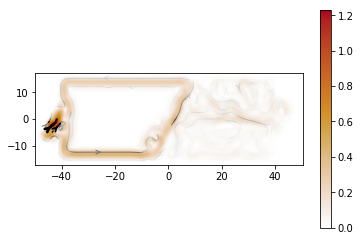

/home/jerem/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


3.848558088766748e-08


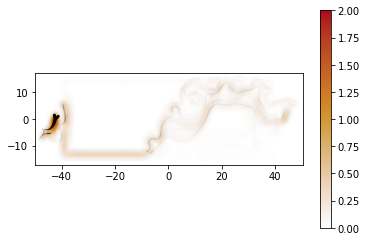

/home/jerem/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


3.442255000735647e-08


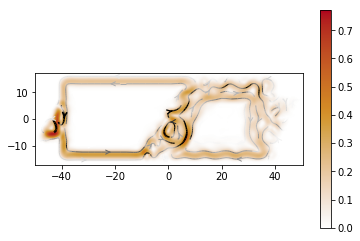

/home/jerem/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


3.142334520979794e-08


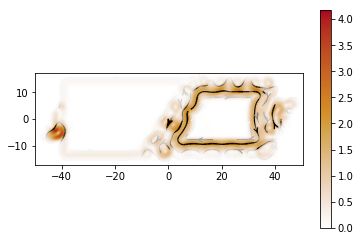

/home/jerem/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


2.9092364597322457e-08


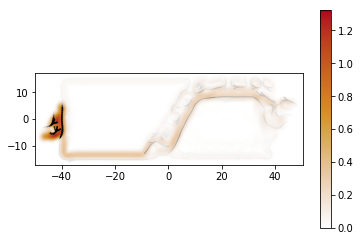

/home/jerem/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


2.7213415223573066e-08


In [ ]:
Field = np.linspace(0, 1, 10)
for B0 in Field:
    B = B0
    if B != 0:
        s_f= math.sqrt(h_bar/(B*e))
    print(s_f)
    wfs = kwant.wave_function(graph, energy=Ef) # to obtain the wave functions of the system 
    de = kwant.operator.Density(graph)
    J0 = kwant.operator.Current(graph)
    wf_left = wfs(0)
    current = sum(J0(p) for p in wf_left)
    density = sum(de(p) for p in wf_left)
        #kwant.plotter.density(graph, density)
    kwant.plotter.current(graph, current)


In [8]:
#params = SimpleNamespace(phi=phi)#, Vg=Vg, l_pot=l_pot, w_pot=w_pot, R=R, shape=shape)

In [9]:
""" The wavelength must be (much more) larger than the lattice parameter """
lambda_F = 3 * pi * a * t / Ef # computation of the wavelength in graphene
print('Fermi wavelength: ', lambda_F)
if lambda_F/a < 2:
    print('Warning : lambda_F must be larger than the lattice parameter a')

Fermi wavelength:  9.42477796076938


In [12]:
wfs = kwant.wave_function(sys, energy=Ef) # to obtain the wave functions of the system 

J0 = kwant.operator.Current(sys)
wf_left = wfs(0)
current = sum(J0(p) for p in wf_left)

kwant.plotter.current(sys, current, cmap='viridis')

TypeError: Expecting an instance of System.

In [ ]:
N = 20 # number of magnetic field values
B_eff_max = 0.2 # higher magnetic field
B_effs = np.linspace(0, B_eff_max, N) # vector of the magnetic fields

G = np.zeros([N,1])

for i,B_eff in enumerate(B_effs):
    params = SimpleNamespace(B_eff=B_eff)
    smatrix = kwant.smatrix(sys, energy = Ef) # transmission matrix (here this)
    T = smatrix.transmission(1, 0) # transmission value obtained from the left lead towards the right lead
    G[i] = T
    
plt.plot(B_effs,G)

plt.xlabel('Magnetic field (T)')
plt.ylabel('Transmission (2e²/h)')

plt.show()

In [ ]:
pyplot.plot(E,Gr)

pyplot.xlabel('Energy (t)', fontsize=18)
pyplot.ylabel('Transmission', fontsize=18)